# Figure 1 
Schematic of the Large Ensemble testbed. First, 100 model members are sampled for pCO2and driver data as the SOCATv5 pCO2 product (Sabine et al. 2013). Second, these data are used to train and evaluate the SOM-FFN( Landschützer et al. 2013, 2014,2015, 2016). Third, the network is forced with full-field driver data to estimate pCO2  globally at a monthly resolution. Fourth, reconstructed pCO2 is statistically compared to the model truth.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'
%config InlineBackend.print_figure_kwargs = {'dpi':300, 'bbox_inches': 'tight'}
import xarray as xr
import numpy as np
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy
import scipy.io
from scipy import stats
import cmocean as cm
#import seaborn as sns
import datetime
import os

# to format dates
import matplotlib.dates as mdates

In [2]:
from tqdm import tqdm

In [3]:
%run _define_model_class.ipynb
%run _define_plotting_class.ipynb

In [4]:
dir_raw = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/raw'
dir_clean = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean/'
dir_figs = '/local/data/artemis/workspace/gloege/SOCAT-LE/results/figures_MS'

fl_chl = f'{dir_raw}/large_ensembles/CESM/member_002/Chl_2D_mon_CESM002_1x1_198201-201701.nc'
fl_sst = f'{dir_raw}/large_ensembles/CESM/member_002/SST_2D_mon_CESM002_1x1_198201-201701.nc'
fl_sss = f'{dir_raw}/large_ensembles/CESM/member_002/SSS_2D_mon_CESM002_1x1_198201-201701.nc'
#fl_mld = f'{dir_raw}/CESM_inputs/SSS_2D_mon_CESM001_1x1_198201-201701.nc'
fl_pco2 = f'{dir_raw}/large_ensembles/CESM/member_002/pCO2_2D_mon_CESM002_1x1_198201-201701.nc'
fl_pco2_nn = f'{dir_raw}/interpolated/SOMFFN/CESM/pCO2_2D_mon_CESM002_1x1_198201-201701_SOMFFN.nc'

In [5]:
time = []
for y in np.arange(1982,2017):
    for m in np.arange(0,12):
        time.append(y + m/12)

In [6]:
fl_socat = f'{dir_raw}/SOCAT/SOCATv5_tracks_gridded_monthly.nc'
ds_socat = xr.open_dataset(fl_socat)

lon = ds_socat['xlon']
lat = ds_socat['ylat']

# pCO2 from SOCAT member

In [7]:
ds_pco2 = xr.open_dataset(fl_pco2)

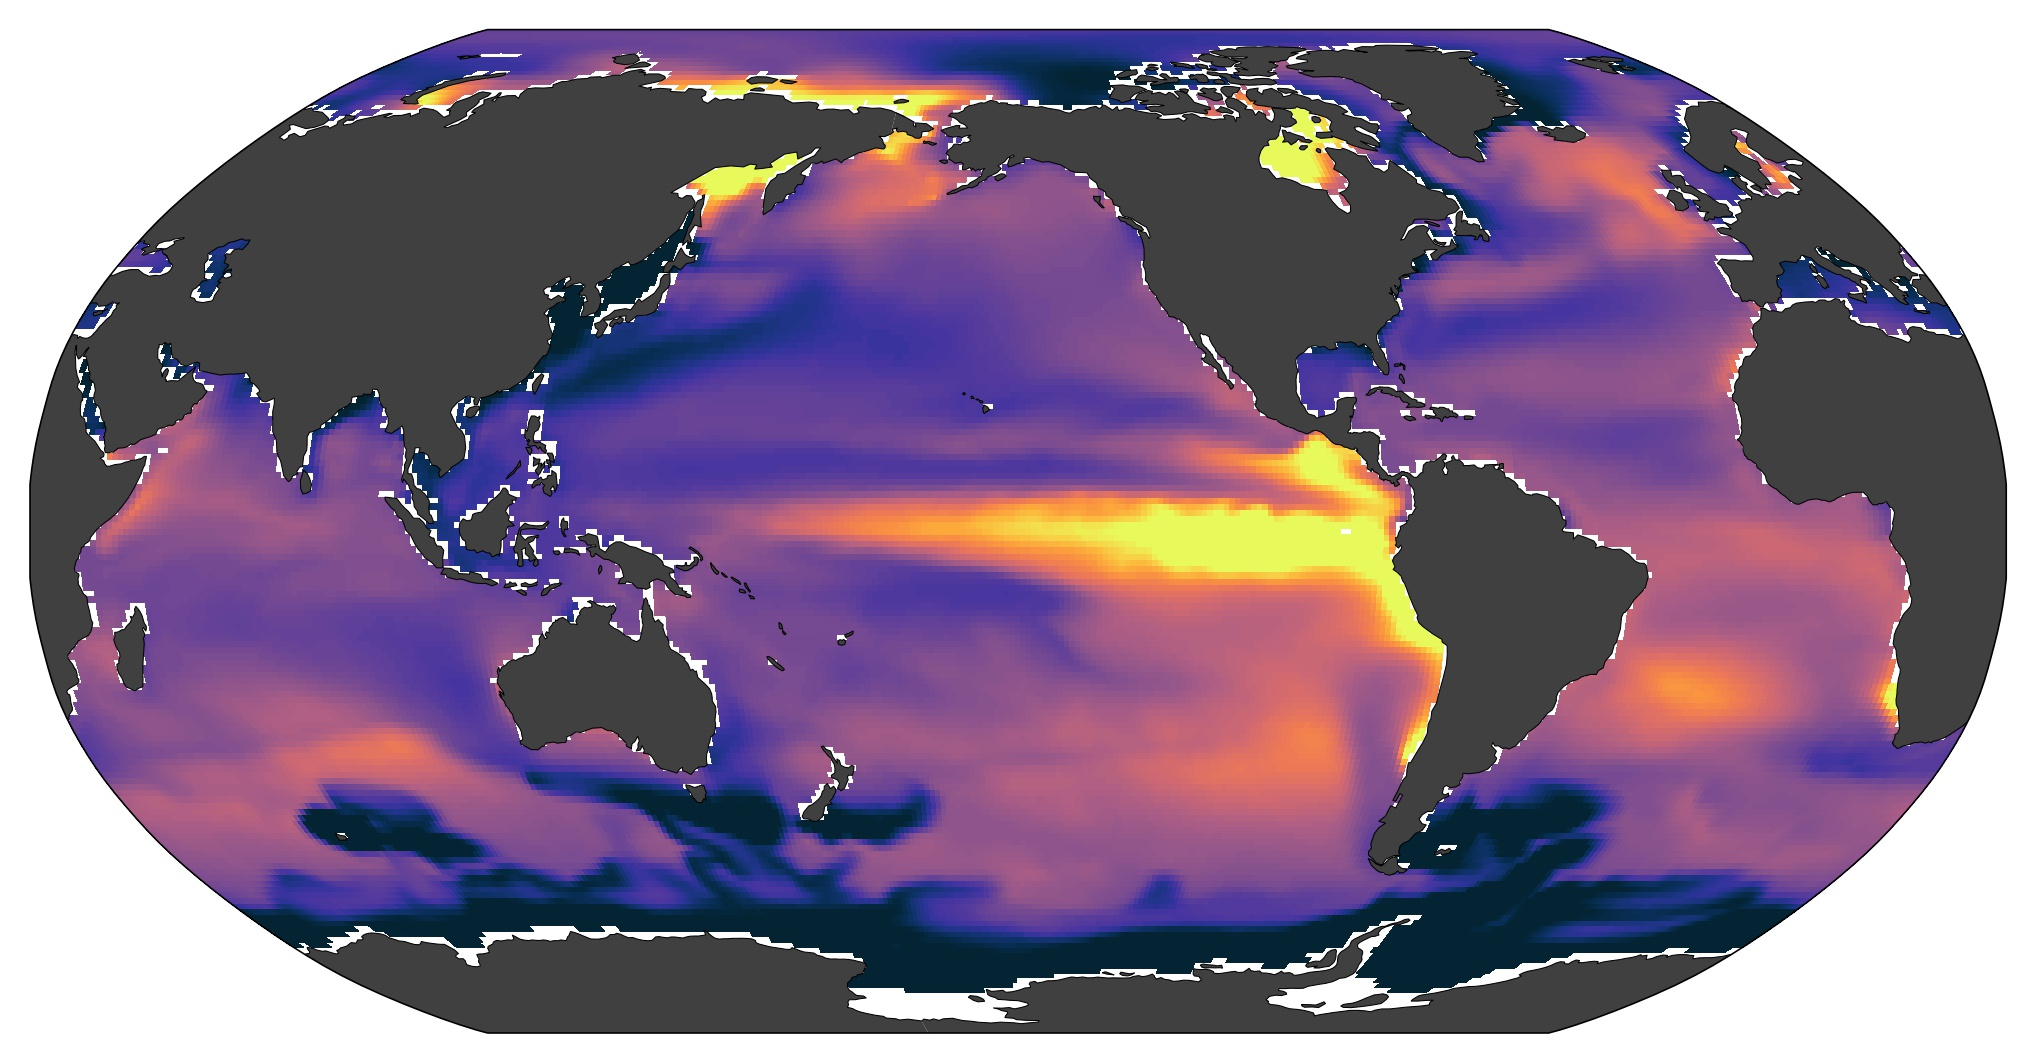

In [8]:
# ==================================================================================
# Define plotting style
# dark: dark_background, 
# light: seaborn-white
# ==================================================================================
plot_style = 'seaborn-talk'

# ==================================================================================
# Which region to plot
# ==================================================================================
region='world'

cmap = cm.cm.thermal
cbar_title = ''
vrange = [280, 440, 40]

# ==================================================================================
#  Plot figures with background
# ==================================================================================
with plt.style.context(plot_style):
    # Setup Figure
    fig = plt.figure(figsize=(8.5,11)) 
    worldmap = SpatialMap2(fig=fig, region='world', 
                   cbar_mode='each',
                   colorbar=False,
                   cbar_location='bottom',
                   nrows_ncols=[1,1])
    
    # January 
    #data = ds_pco2['pCO2'].where((ds_pco2['time.year']==1989),drop=True).\
    #                                where((ds_pco2['time.month']==1), drop=True).mean('time')
    data = ds_pco2['pCO2'].sel(time='1989-01').squeeze()
    #data = np.ma.masked_array(data, mask=(data==0))
    data = xr_add_cyclic_point(data, cyclic_coord='xlon')    
    sub = worldmap.add_plot(lon=data['xlon'], lat=data['ylat'], data=data, 
                      vrange=vrange[0:2], cmap=cmap, ax=0)
    
#fig.savefig(f'{dir_figs}/pCO2_CESM002_Jan1989.pdf',bbox_inches='tight', dpi=300, pad_inches=0)

# pCO2 from model sampled as SOCAT

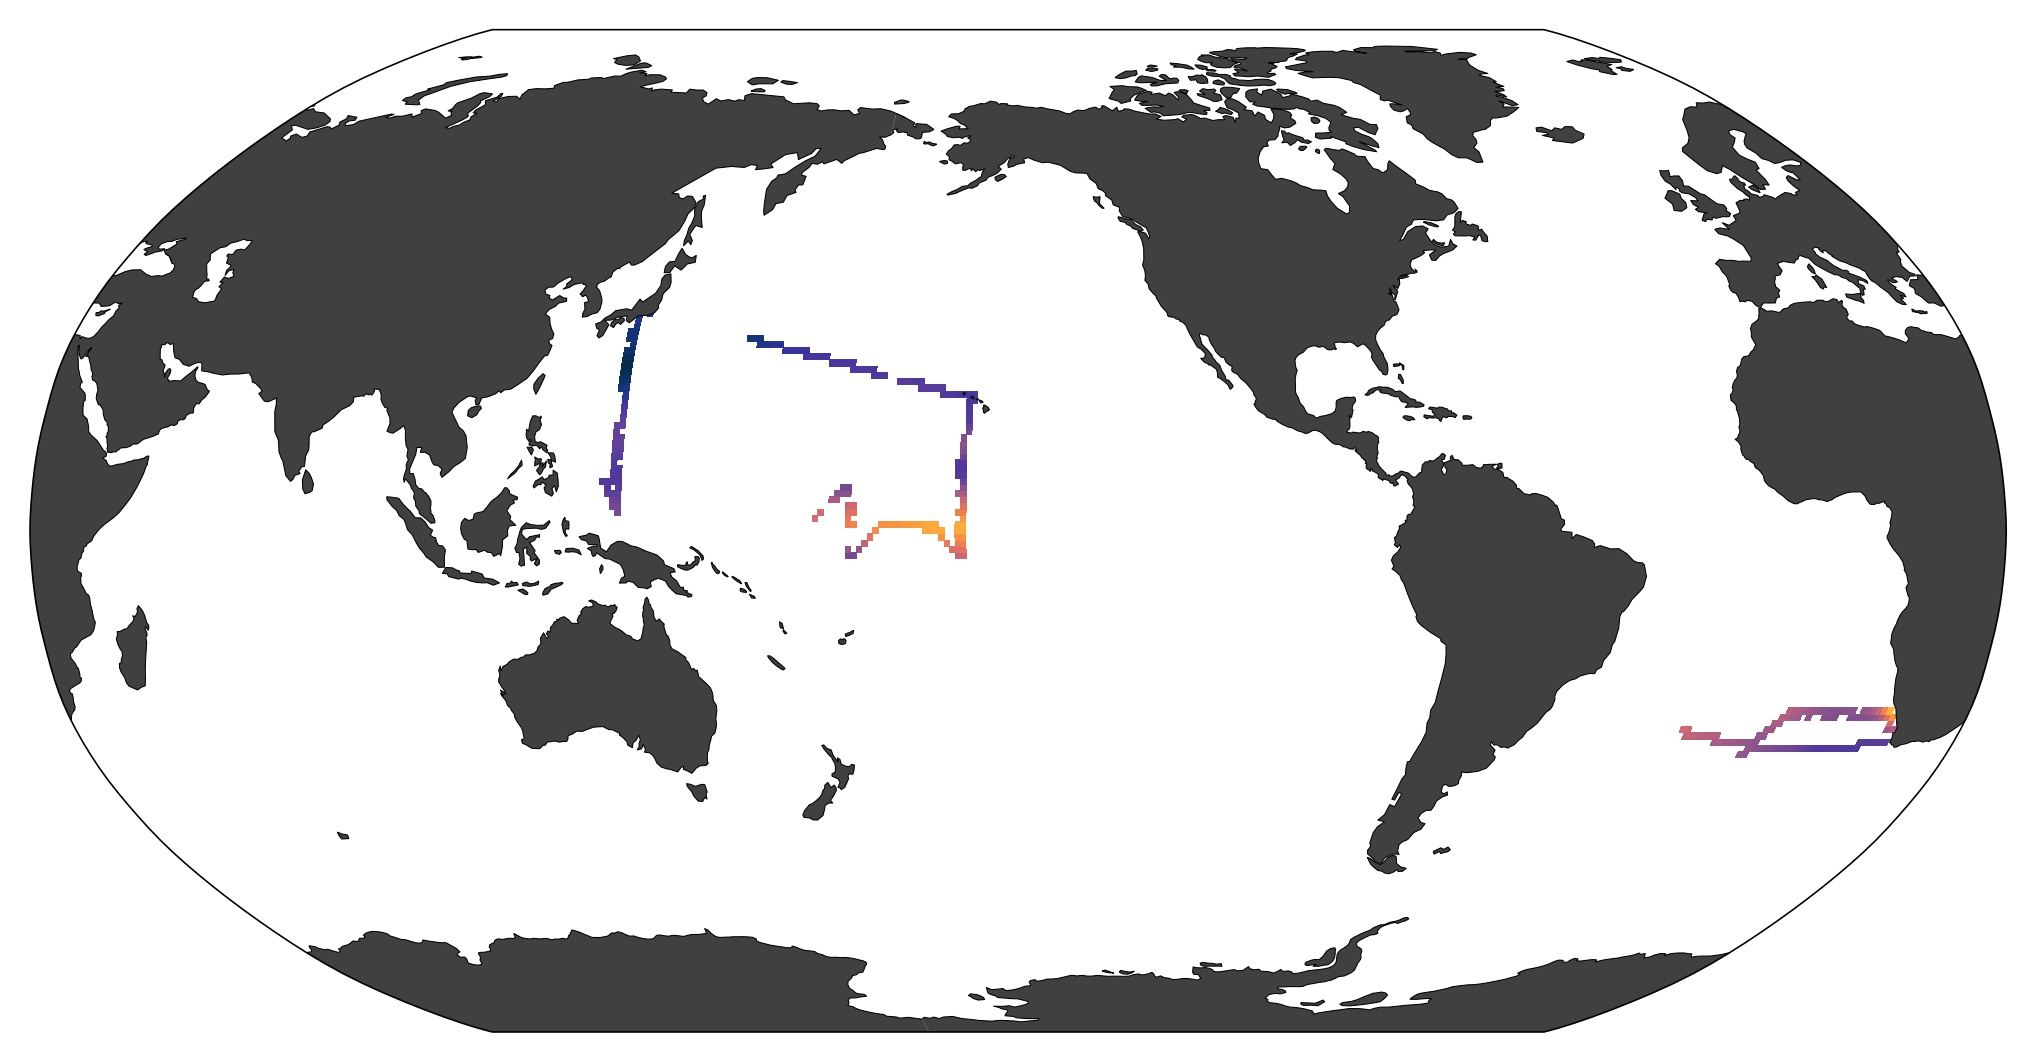

In [9]:
# ==================================================================================
# Define plotting style
# dark: dark_background, 
# light: seaborn-white
# ==================================================================================
plot_style = 'seaborn-talk'

# ==================================================================================
# Which region to plot
# ==================================================================================
region='world'

cmap = cm.cm.thermal
cbar_title = ''
vrange = [280, 440, 40]

# ==================================================================================
#  Plot figures with background
# ==================================================================================
with plt.style.context(plot_style):
    # Setup Figure
    fig = plt.figure(figsize=(8.5,11)) 
    worldmap = SpatialMap2(fig=fig, region='world', 
                   cbar_mode='each',
                   colorbar=False,
                   cbar_location='bottom',
                   nrows_ncols=[1,1])
    
    # January 
    data = ds_pco2['pCO2_socat'].sel(time='1989-01').squeeze()
    data = xr_add_cyclic_point(data, cyclic_coord='xlon')    
    
    sub = worldmap.add_plot(lon=data['xlon'], 
                            lat=data['ylat'], 
                            data=np.ma.masked_array(data, mask=(data==0)), vrange=vrange[0:2], cmap=cmap, ax=0)

    
#fig.savefig(f'{dir_figs}/pCO2_CESM002-sampled_Jan1989.pdf',bbox_inches='tight', dpi=300, pad_inches=0)

# pCO2 inteprolated 

In [11]:
ds_nn = read_peter(model='CESM', member=2)

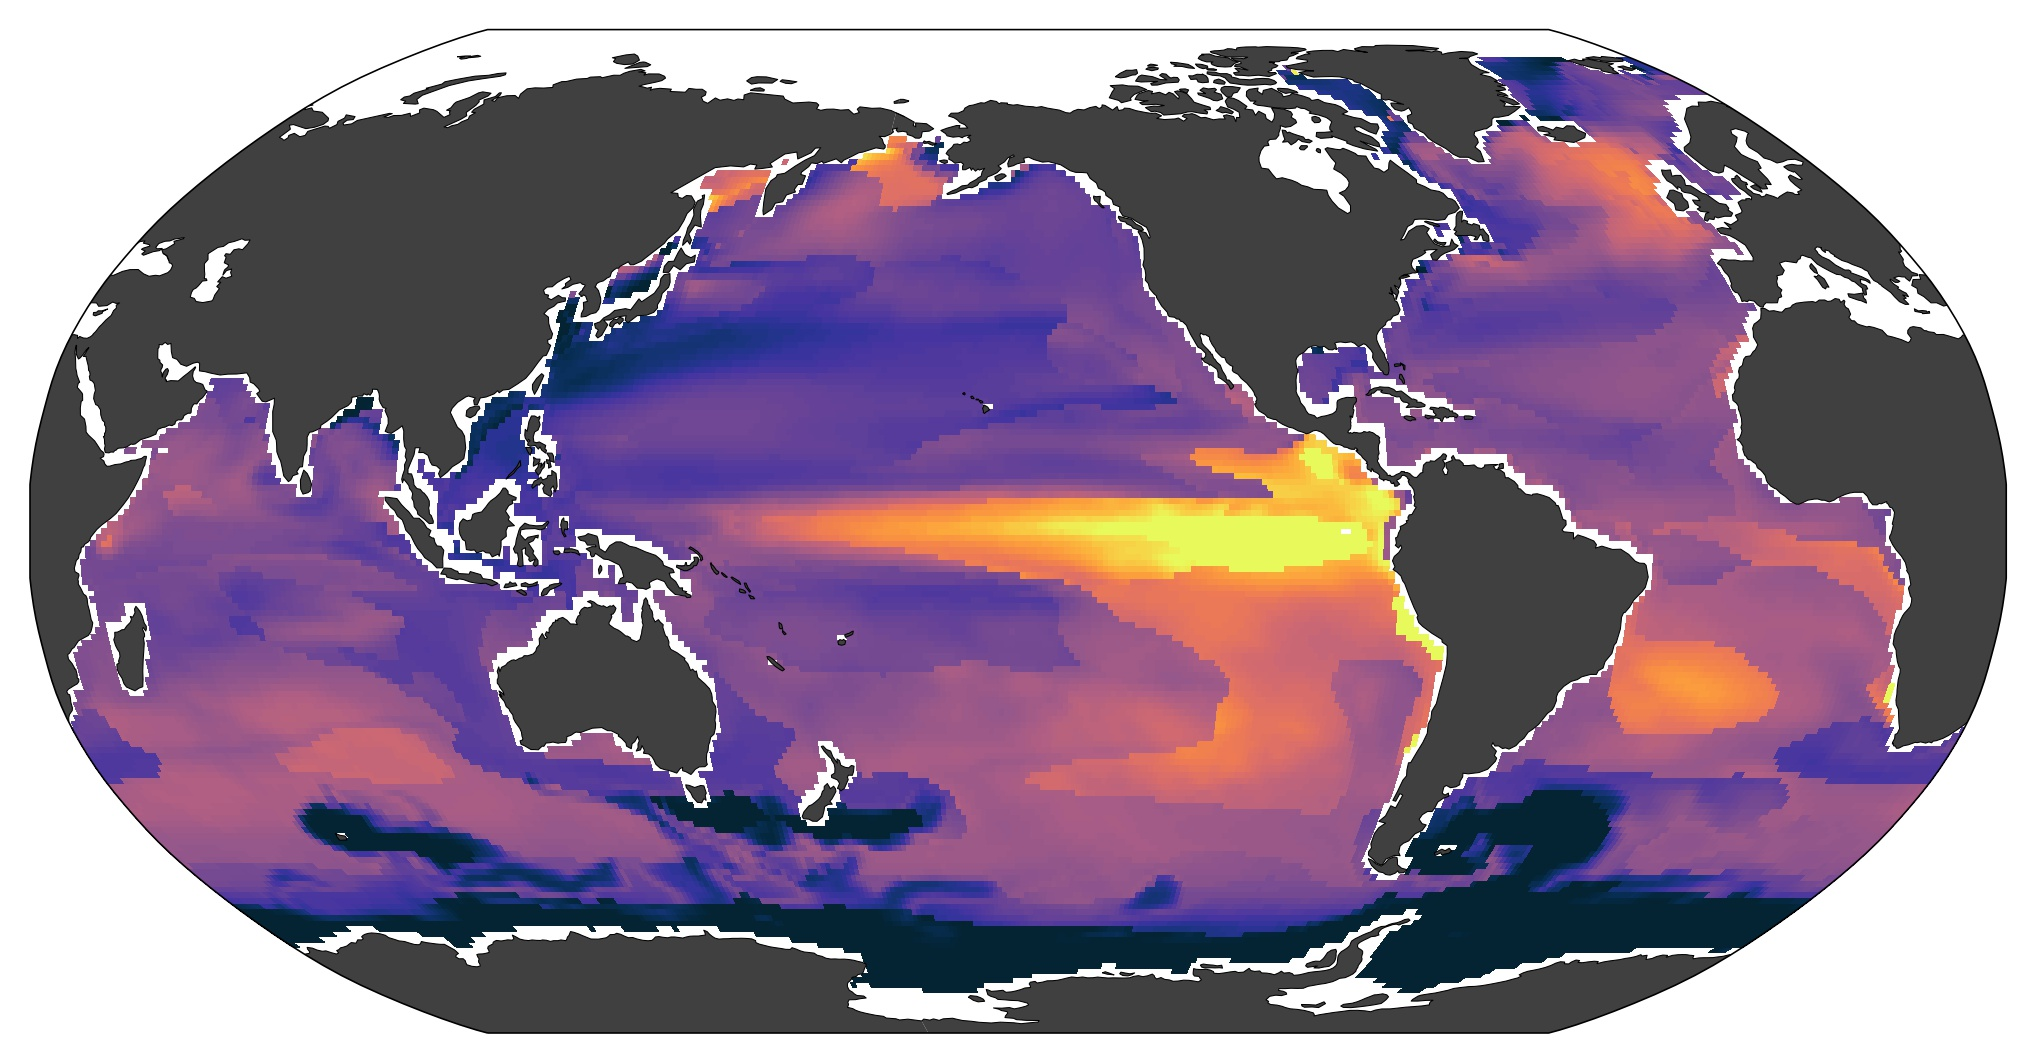

In [12]:
# ==================================================================================
# Define plotting style
# dark: dark_background, 
# light: seaborn-white
# ==================================================================================
plot_style = 'seaborn-talk'

# ==================================================================================
# Which region to plot
# ==================================================================================
region='world'

cmap = cm.cm.thermal
cbar_title = ''
vrange = [280, 440, 40]

# ==================================================================================
#  Plot figures with background
# ==================================================================================
with plt.style.context(plot_style):
    # Setup Figure
    fig = plt.figure(figsize=(8.5,11)) 
    worldmap = SpatialMap2(fig=fig, region='world', 
                   cbar_mode='each',
                   colorbar=False,
                   cbar_location='bottom',
                   nrows_ncols=[1,1])
    
    # January 
    data = ds_nn['pco2'].sel(time='1989-01').squeeze()
    data = xr_add_cyclic_point(data, cyclic_coord='lon')    

    sub = worldmap.add_plot(lon=data['lon'], 
                            lat=data['lat'], 
                            data=data, vrange=vrange[0:2], cmap=cmap, ax=0)
fig.savefig(f'{dir_figs}/pCO2_CESM002-SOMFFN_Jan1989.pdf',bbox_inches='tight', dpi=300, pad_inches=0)

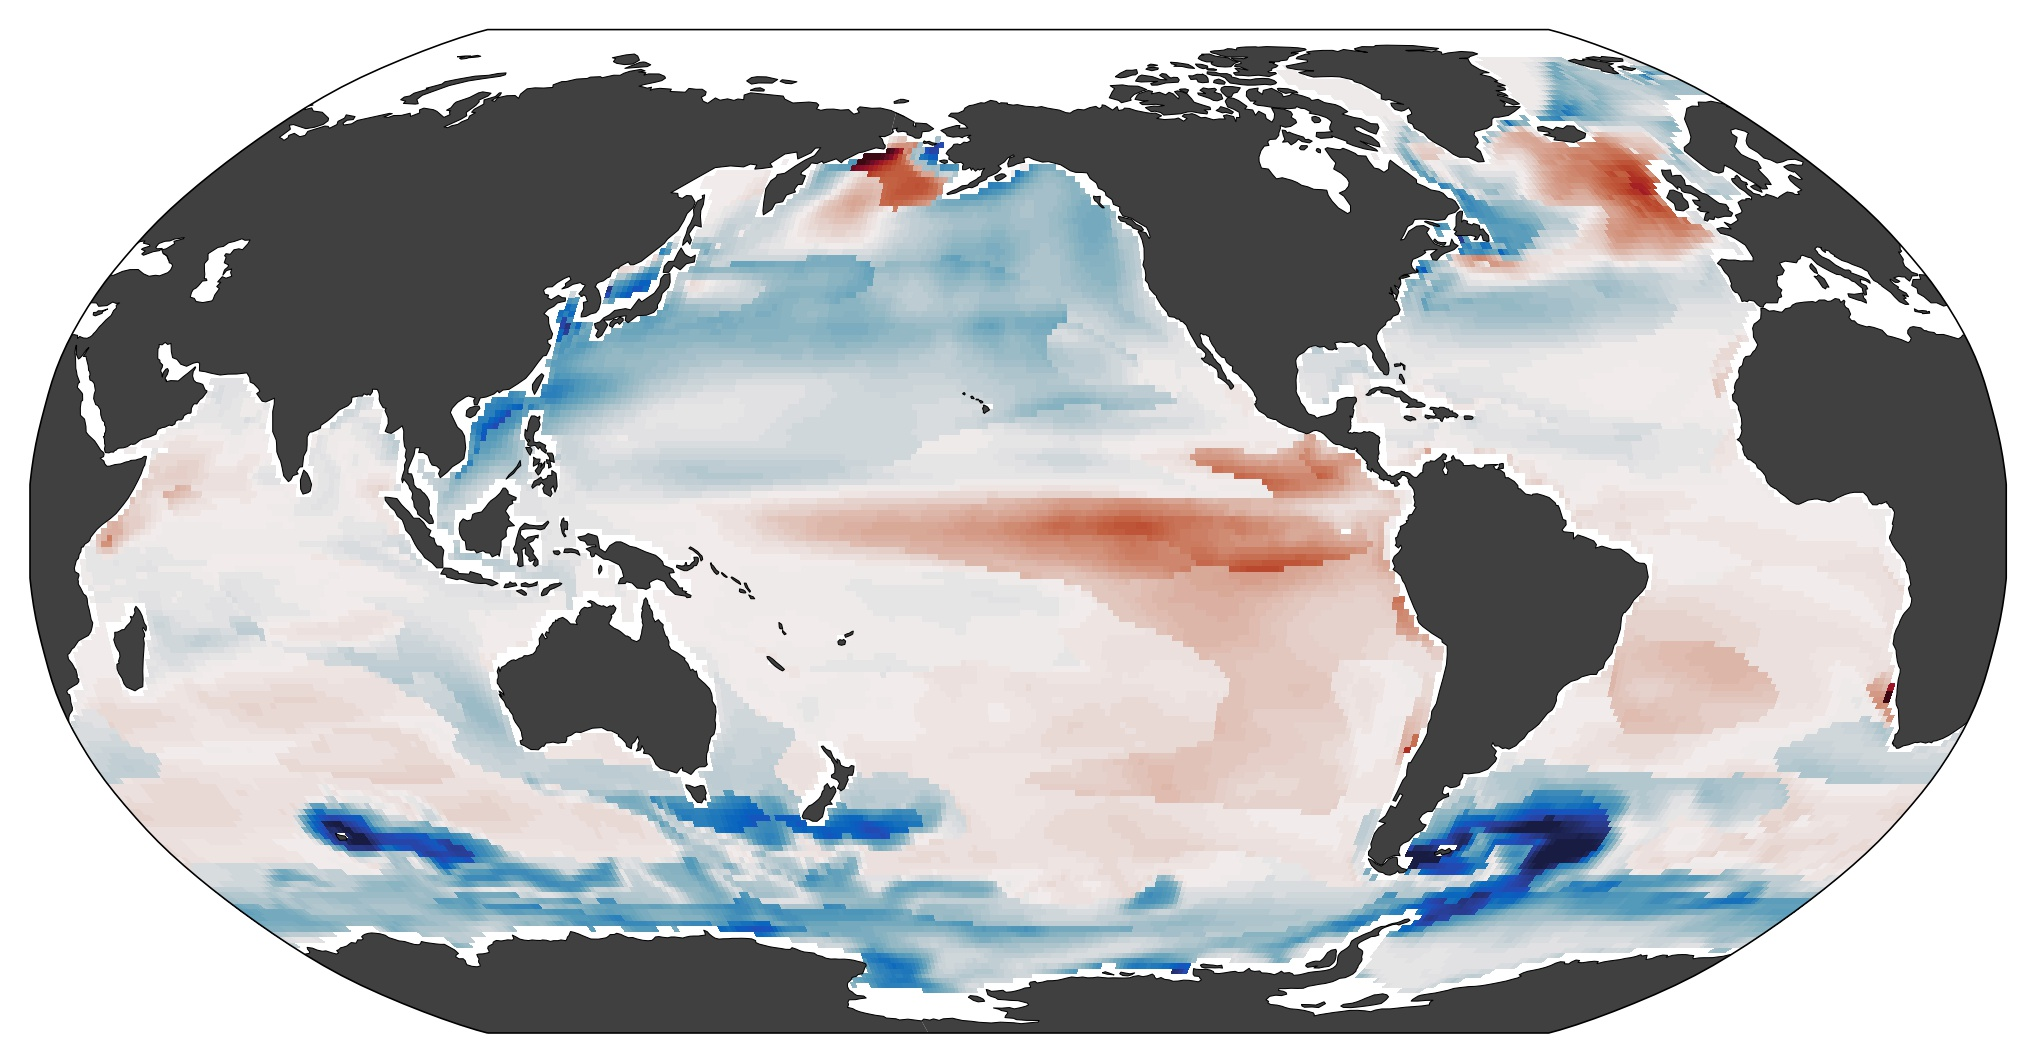

In [83]:
# ==================================================================================
# Define plotting style
# dark: dark_background, 
# light: seaborn-white
# ==================================================================================
plot_style = 'seaborn-talk'

# ==================================================================================
# Which region to plot
# ==================================================================================
region='world'

cmap = cm.cm.balance
cbar_title = ''
vrange = [-10, 10, 2]

# ==================================================================================
#  Plot figures with background
# ==================================================================================
with plt.style.context(plot_style):
    # Setup Figure
    fig = plt.figure(figsize=(8.5,11)) 
    worldmap = SpatialMap2(fig=fig, region='world', 
                   cbar_mode='each',
                   colorbar=False,
                   cbar_location='bottom',
                   nrows_ncols=[1,1])
    
    # January 
    data = ds_recon['F_somffn'].sel(time='1989-01').squeeze()
    data = xr_add_cyclic_point(data, cyclic_coord='lon')    

    
    
    sub = worldmap.add_plot(lon=data['lon'], 
                            lat=data['lat'], 
                            data=data, vrange=vrange[0:2], cmap=cmap, ax=0)
    
    #worldmap.add_plot(lon,lat)
#fig.savefig(f'{dir_figs}/pCO2_CESM002-SOMFFN_Jan1989.pdf',bbox_inches='tight', dpi=300, pad_inches=0)

# Temporal decomposition

In [66]:
# Load model decomp
dir_clean = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'
ds_recon = xr.open_dataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_CESM002_SOMFFN.nc')
ds_model = xr.open_dataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_CESM002_MODEL.nc')


# Define location 23.5 is hots
hot = [-55.5, 360-158.5]
lat = hot[0]
lon = hot[1]

# Get data at sites
ds_recon_site = ds_recon.where((ds_recon['lat']==lat) & 
                               (ds_recon['lon']==lon), drop=True).squeeze()

ds_model_site = ds_model.where((ds_model['lat']==lat) & 
                               (ds_model['lon']==lon), drop=True).squeeze()

## Full signal

In [48]:
ds_model_site

<xarray.Dataset>
Dimensions:                (time: 420)
Coordinates:
  * time                   (time) datetime64[ns] 1982-01-15 ... 2016-12-15
    lat                    float32 23.5
    lon                    float32 201.5
Data variables:
    F_member               (time) float64 -1.024 -2.113 ... -0.8624 -1.476
    F_member_detrend       (time) float64 -0.1159 -1.205 ... 0.006941 -0.6072
    F_member_dec           (time) float64 -0.1137 -0.1109 ... -0.163 -0.1658
    F_member_seasonal      (time) float64 -0.4175 -0.725 ... 0.1064 -0.116
    F_member_residual      (time) float64 0.4152 -0.3694 ... 0.06353 -0.3255
    F_member_residual_low  (time) float64 0.155 0.09524 ... -0.0931 -0.1129

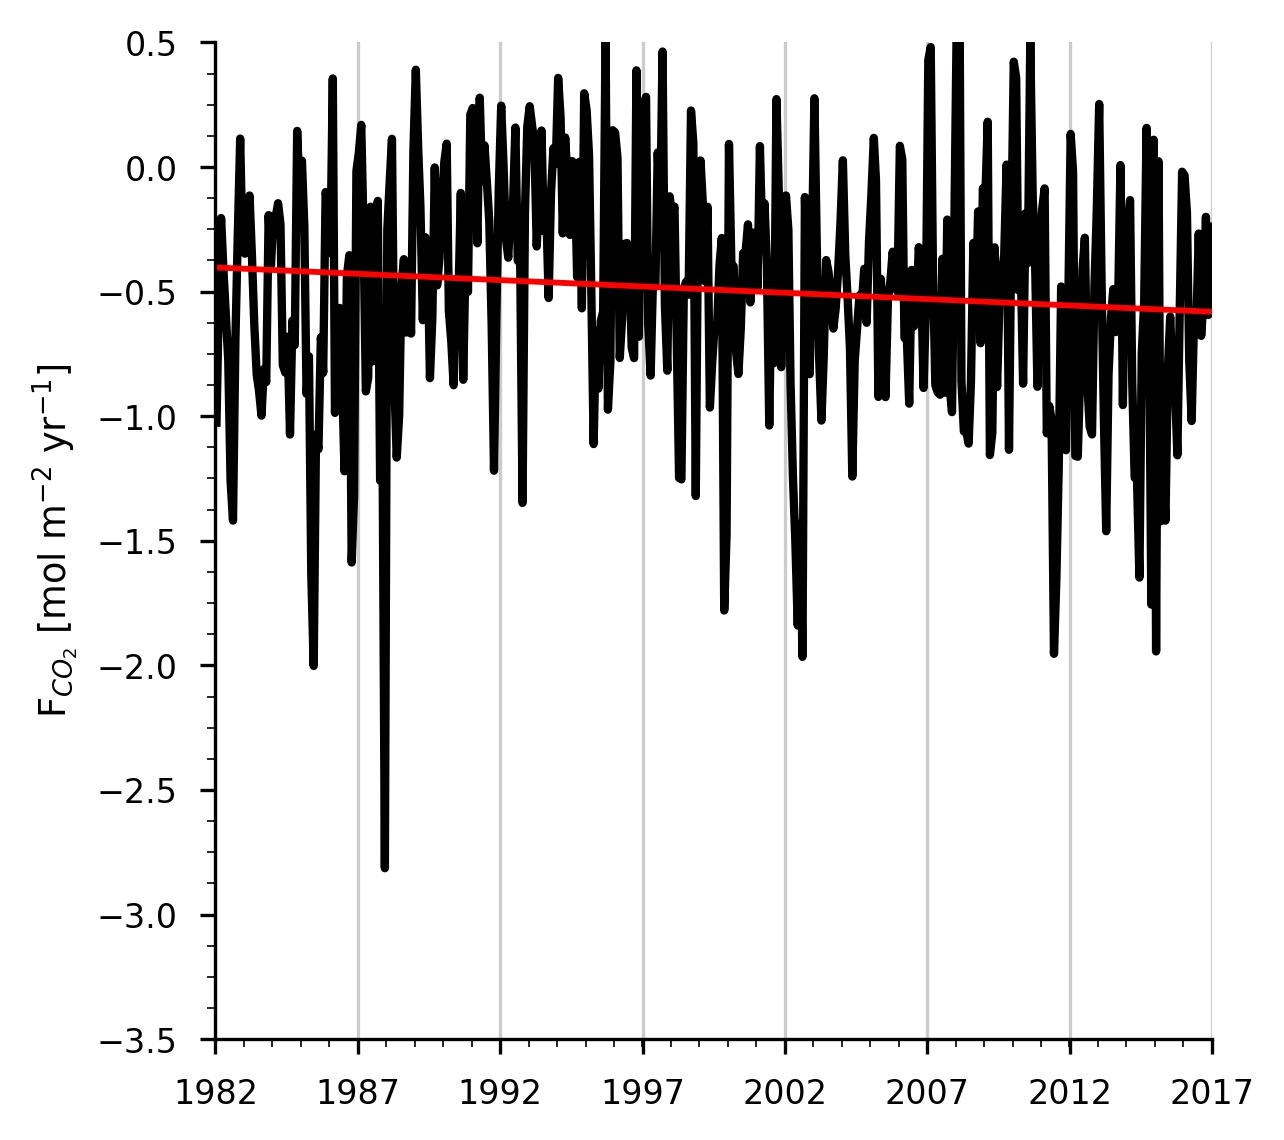

In [61]:
plot_style = 'seaborn-paper'

time = ds_recon_site['time']
var = 'F_somffn'
ylim = [-3.5,0.5]

## Linear regression
time_vec = np.arange(1982, 2017, 1/12)
reg = scipy.stats.linregress(x=time_vec, 
                             y=ds_recon_site[f'{var}'].values)

with plt.style.context(plot_style):
    fig = plt.figure(dpi=300) 
    ax = fig.add_subplot(111)

    ax.plot(time, ds_recon_site[f'{var}'],color='k', linewidth=2)
    ax.plot(time, reg.intercept + time_vec*reg.slope, 'r')
    
    ## ------------------------------------
    ## axis limits and labels
    ## -----------------------------------
    ax.set_xlim(time[0].values, time[-1].values)
    ax.set_xticks(['1982', '1987', '1992', '1997', '2002', '2007', '2012', '2017'])

    # format the dates
    myFmt = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_formatter(myFmt)

    ax.set_ylim(ylim[0], ylim[1])
    ax.set_ylabel('F$_{CO_2}$ [mol m$^{-2}$ yr$^{-1}$]')
    
    ## ------------------------------------
    ## Modify axes
    ## -----------------------------------
    # Turn on the minor ticks
    # Turn off the display of all ticks.
    ax.tick_params(which='both', # Options for both major and minor ticks
                    top='off', # turn off top ticks
                    left='off', # turn off left ticks
                    right='off',  # turn off right ticks
                    bottom='off') # turn off bottom ticks


    ### Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ### major / minor tick lines
    #ax.minorticks_on()
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    #ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

    ### Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ## ------------------------------------
    ## Make plot square 
    ## and add grid lines
    ## -----------------------------------
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    ax.get_position().bounds
    ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

    # Don't allow the axis to be on top of your data
    ax.set_axisbelow(True)

#fig.savefig(f'{dir_figs}/bias_vs_nobs.pdf',bbox_inches='tight', dpi=300, pad_inches=0)

In [20]:
#print(f'Slope = {reg.slope} uatm/yr')

Slope = -0.005648031837767423 uatm/yr


## Detrended

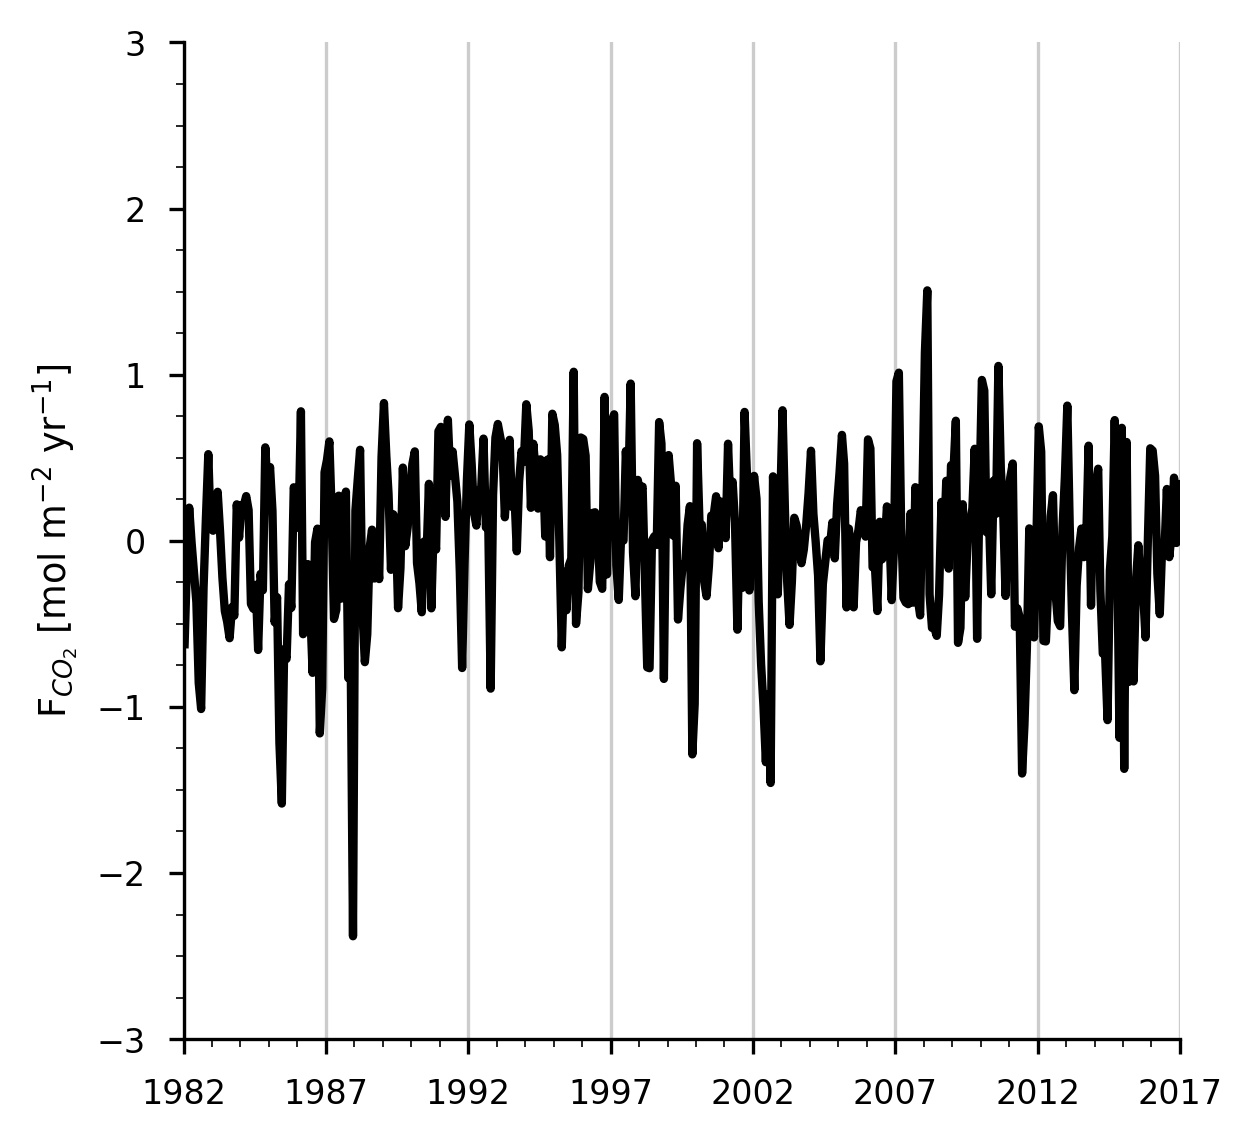

In [74]:
plot_style = 'seaborn-paper'

time = ds_recon_site['time']
var = 'F_somffn_detrend'
ylim = [-3,3]

## Linear regression
time_vec = np.arange(1982, 2017, 1/12)
reg = scipy.stats.linregress(x=time_vec, 
                             y=ds_recon_site[f'{var}'].values)

with plt.style.context(plot_style):
    fig = plt.figure(dpi=300) 
    ax = fig.add_subplot(111)

    ax.plot(time, ds_recon_site[f'{var}'],color='k', linewidth=2)
    #ax.plot(time, reg.intercept + time_vec*reg.slope, 'r')
    
    ## ------------------------------------
    ## axis limits and labels
    ## -----------------------------------
    ax.set_xlim(time[0].values, time[-1].values)
    ax.set_xticks(['1982', '1987', '1992', '1997', '2002', '2007', '2012', '2017'])
    #ax.set_xticks(['1982', '1987', '1992', '1997', '2002', '2007', '2012', '2017'])
    
    # format the dates
    myFmt = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_formatter(myFmt)

    ax.set_ylim(ylim[0], ylim[1])
    ax.set_ylabel('F$_{CO_2}$ [mol m$^{-2}$ yr$^{-1}$]')
    
    ## ------------------------------------
    ## Modify axes
    ## -----------------------------------
    # Turn on the minor ticks
    # Turn off the display of all ticks.
    ax.tick_params(which='both', # Options for both major and minor ticks
                    top='off', # turn off top ticks
                    left='off', # turn off left ticks
                    right='off',  # turn off right ticks
                    bottom='off') # turn off bottom ticks


    ### Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ### major / minor tick lines
    #ax.minorticks_on()
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    #ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

    ### Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ## ------------------------------------
    ## Make plot square 
    ## and add grid lines
    ## -----------------------------------
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    ax.get_position().bounds
    ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

    # Don't allow the axis to be on top of your data
    ax.set_axisbelow(True)

#fig.savefig(f'{dir_figs}/bias_vs_nobs.pdf',bbox_inches='tight', dpi=300, pad_inches=0)

## Monthly variability

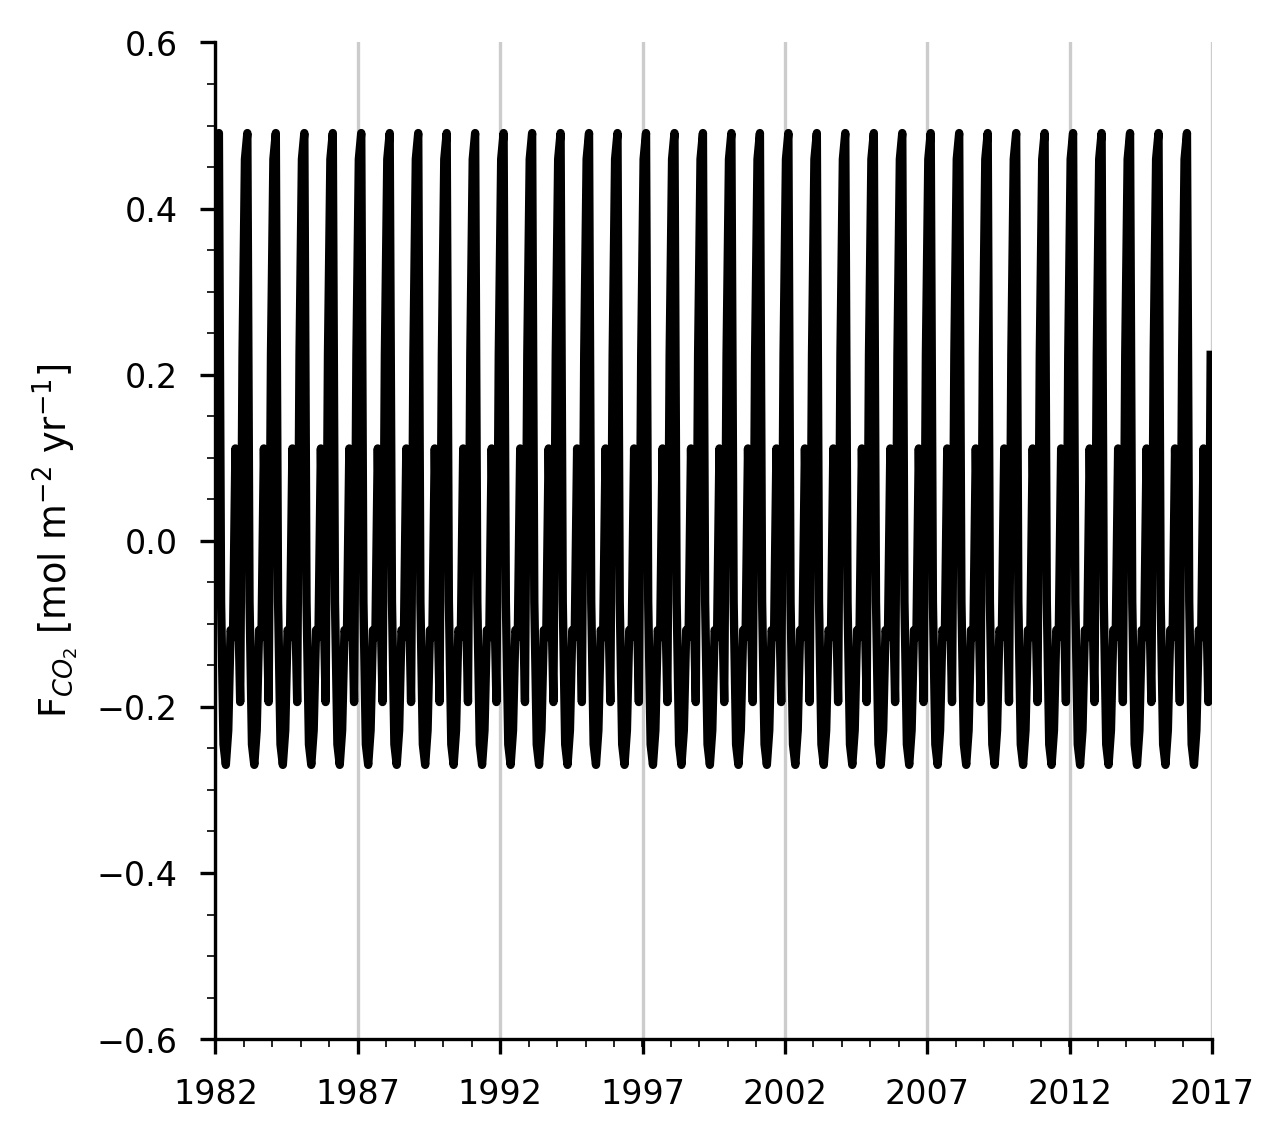

In [73]:
plot_style = 'seaborn-paper'

time = ds_recon_site['time']
var = 'F_somffn_seasonal'
ylim = [-0.6, 0.6]

## Linear regression
time_vec = np.arange(1982, 2017, 1/12)
reg = scipy.stats.linregress(x=time_vec, 
                             y=ds_recon_site[f'{var}'].values)

with plt.style.context(plot_style):
    fig = plt.figure(dpi=300) 
    ax = fig.add_subplot(111)

    ax.plot(time, ds_recon_site[f'{var}'],color='k', linewidth=2)
    #ax.plot(time, reg.intercept + time_vec*reg.slope, 'r')
    
    ## ------------------------------------
    ## axis limits and labels
    ## -----------------------------------
    ax.set_xlim(time[0].values, time[-1].values)
    ax.set_xticks(['1982', '1987', '1992', '1997', '2002', '2007', '2012', '2017'])
    #ax.set_xticks(['1982', '1987', '1992', '1997', '2002', '2007', '2012', '2017'])
    
    # format the dates
    myFmt = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_formatter(myFmt)

    ax.set_ylim(ylim[0], ylim[1])
    ax.set_ylabel('F$_{CO_2}$ [mol m$^{-2}$ yr$^{-1}$]')
    
    ## ------------------------------------
    ## Modify axes
    ## -----------------------------------
    # Turn on the minor ticks
    # Turn off the display of all ticks.
    ax.tick_params(which='both', # Options for both major and minor ticks
                    top='off', # turn off top ticks
                    left='off', # turn off left ticks
                    right='off',  # turn off right ticks
                    bottom='off') # turn off bottom ticks


    ### Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ### major / minor tick lines
    #ax.minorticks_on()
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    #ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

    ### Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ## ------------------------------------
    ## Make plot square 
    ## and add grid lines
    ## -----------------------------------
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    ax.get_position().bounds
    ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

    # Don't allow the axis to be on top of your data
    ax.set_axisbelow(True)

#fig.savefig(f'{dir_figs}/bias_vs_nobs.pdf',bbox_inches='tight', dpi=300, pad_inches=0)

## Sub-decadal variability

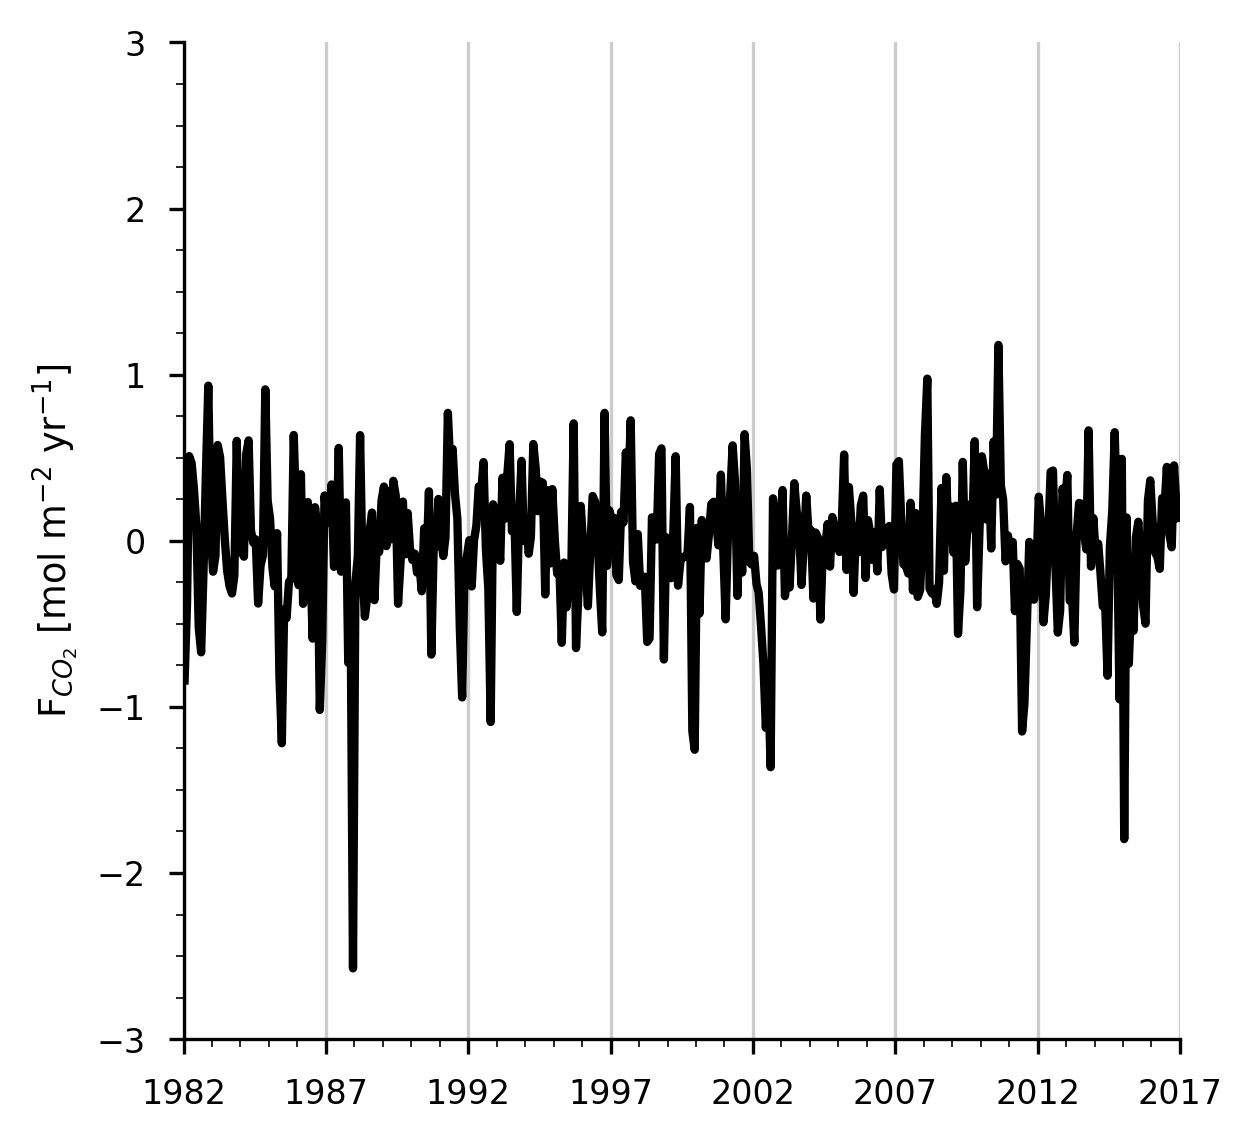

In [71]:
plot_style = 'seaborn-paper'

time = ds_recon_site['time']
var = 'F_somffn_residual'
ylim = [-3,3]

## Linear regression
time_vec = np.arange(1982, 2017, 1/12)
reg = scipy.stats.linregress(x=time_vec, 
                             y=ds_recon_site[f'{var}'].values)

with plt.style.context(plot_style):
    fig = plt.figure(dpi=300) 
    ax = fig.add_subplot(111)

    ax.plot(time, ds_recon_site[f'{var}'],color='k', linewidth=2)
    #ax.plot(time, reg.intercept + time_vec*reg.slope, 'r')
    
    ## ------------------------------------
    ## axis limits and labels
    ## -----------------------------------
    ax.set_xlim(time[0].values, time[-1].values)
    ax.set_xticks(['1982', '1987', '1992', '1997', '2002', '2007', '2012', '2017'])
    #ax.set_xticks(['1982', '1987', '1992', '1997', '2002', '2007', '2012', '2017'])
    
    # format the dates
    myFmt = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_formatter(myFmt)

    ax.set_ylim(ylim[0], ylim[1])
    ax.set_ylabel('F$_{CO_2}$ [mol m$^{-2}$ yr$^{-1}$]')
    
    ## ------------------------------------
    ## Modify axes
    ## -----------------------------------
    # Turn on the minor ticks
    # Turn off the display of all ticks.
    ax.tick_params(which='both', # Options for both major and minor ticks
                    top='off', # turn off top ticks
                    left='off', # turn off left ticks
                    right='off',  # turn off right ticks
                    bottom='off') # turn off bottom ticks


    ### Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ### major / minor tick lines
    #ax.minorticks_on()
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    #ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

    ### Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ## ------------------------------------
    ## Make plot square 
    ## and add grid lines
    ## -----------------------------------
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    ax.get_position().bounds
    ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

    # Don't allow the axis to be on top of your data
    ax.set_axisbelow(True)

#fig.savefig(f'{dir_figs}/bias_vs_nobs.pdf',bbox_inches='tight', dpi=300, pad_inches=0)

## Decadal

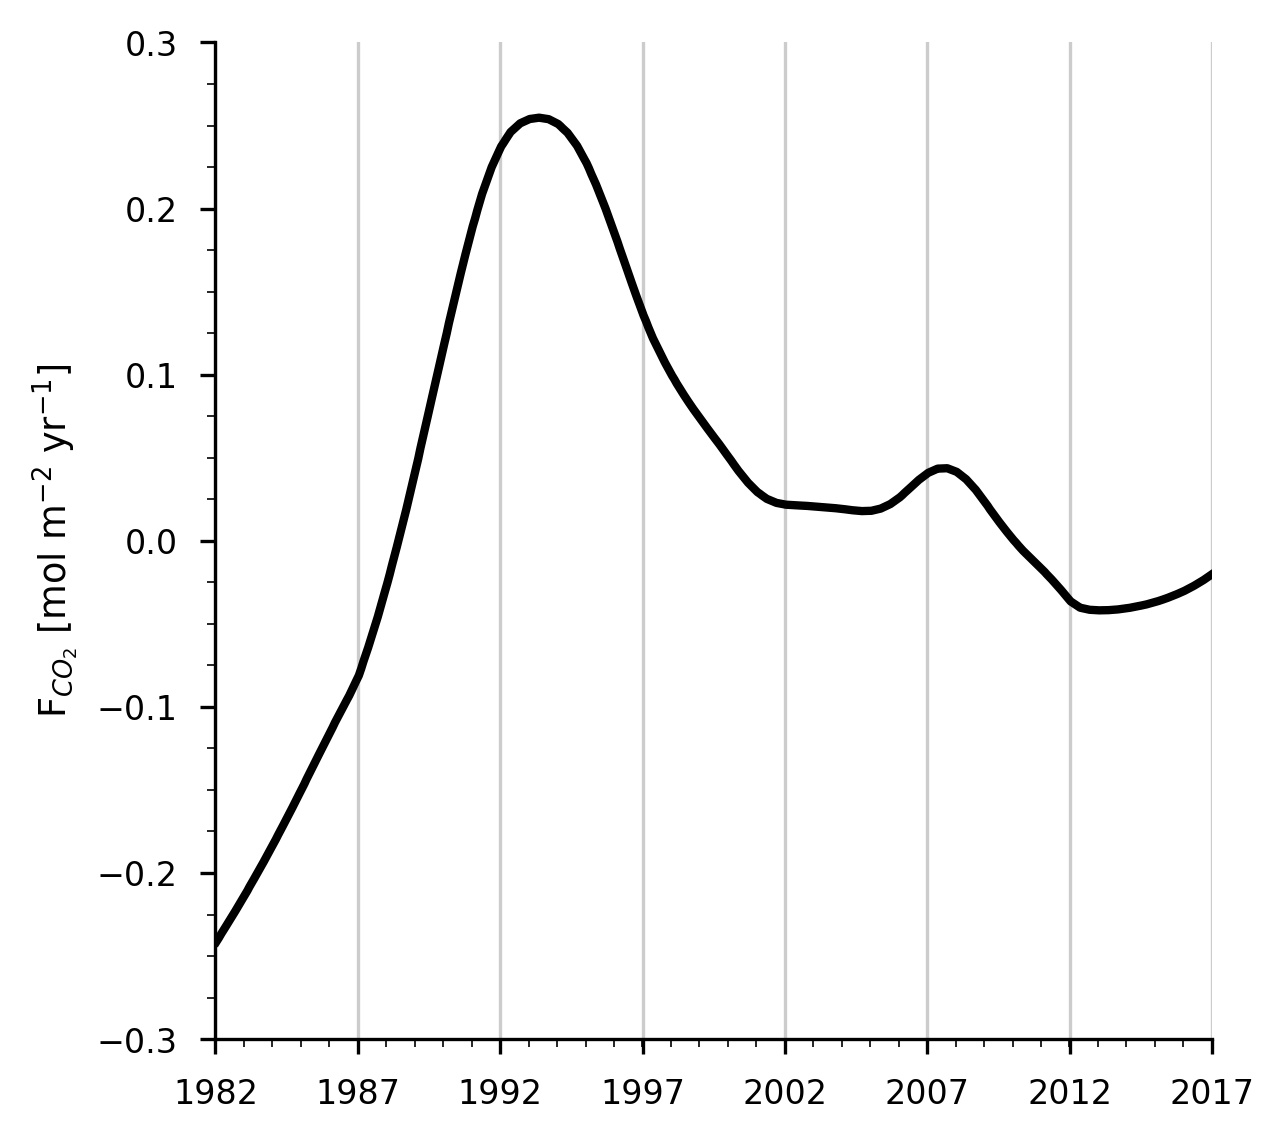

In [78]:
plot_style = 'seaborn-paper'

time = ds_recon_site['time']
var = 'F_somffn_dec'
ylim = [-0.3, 0.3]

## Linear regression
time_vec = np.arange(1982, 2017, 1/12)
reg = scipy.stats.linregress(x=time_vec, 
                             y=ds_recon_site[f'{var}'].values)

with plt.style.context(plot_style):
    fig = plt.figure(dpi=300) 
    ax = fig.add_subplot(111)

    #ax.plot(time, ds_recon_site[f'F_somffn_detrend'],color=[0.9,0.9,0.9], linewidth=2)
    ax.plot(time, ds_recon_site[f'{var}'],color='k', linewidth=2)
    #ax.plot(time, ds_model_site[f'F_member_dec'],color='r', linewidth=2)
    #ax.plot(time, reg.intercept + time_vec*reg.slope, 'r')
    
    ## ------------------------------------
    ## axis limits and labels
    ## -----------------------------------
    ax.set_xlim(time[0].values, time[-1].values)
    ax.set_xticks(['1982', '1987', '1992', '1997', '2002', '2007', '2012', '2017'])
    #ax.set_xticks(['1982', '1987', '1992', '1997', '2002', '2007', '2012', '2017'])
    
    # format the dates
    myFmt = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_formatter(myFmt)

    ax.set_ylim(ylim[0], ylim[1])
    ax.set_ylabel('F$_{CO_2}$ [mol m$^{-2}$ yr$^{-1}$]')
    
    ## ------------------------------------
    ## Modify axes
    ## -----------------------------------
    # Turn on the minor ticks
    # Turn off the display of all ticks.
    ax.tick_params(which='both', # Options for both major and minor ticks
                    top='off', # turn off top ticks
                    left='off', # turn off left ticks
                    right='off',  # turn off right ticks
                    bottom='off') # turn off bottom ticks


    ### Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ### major / minor tick lines
    #ax.minorticks_on()
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    #ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

    ### Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ## ------------------------------------
    ## Make plot square 
    ## and add grid lines
    ## -----------------------------------
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    ax.get_position().bounds
    ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

    # Don't allow the axis to be on top of your data
    ax.set_axisbelow(True)

#fig.savefig(f'{dir_figs}/bias_vs_nobs.pdf',bbox_inches='tight', dpi=300, pad_inches=0)